In [1]:
# import sys
# # # !conda remove --yes --prefix {sys.prefix} scipy
# !{sys.executable} -m pip install paretoset

In [168]:
import matplotlib
# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import cm
import numpy as np
import pandas as pd
import seaborn as sns
import math

sns.set_theme()

In [169]:
def read_and_process_df(path):
    df = pd.read_csv(path)
    df.drop(df.index[1:4], inplace=True)
    df.drop(df.index[16:], inplace=True)
    return df

In [170]:
violation_df = read_and_process_df("./60 day numbers - violation-time.csv")

In [171]:
violation_df

,Start Date,End Date,Num,Default Ordering,Purple,Blue,Orange,Green,Yellow,Brown,...,Orange.49,Green.49,Yellow.49,Brown.49,White.49,Black.49,Asian.49,Hispanic.49,American_Indian.49,Others.49
0,2014-09-01,2014-10-31,1665.0,28.38023,32.77273,27.51818,28.30435,23.82500,31.25000,38.33333,...,32.73913,31.57500,26.70000,23.33333,24.53980,27.85970,23.17882,30.67369,14.43155,26.38334
4,2013-12-31,2014-03-01,1313.0,32.97015,32.14286,35.68750,32.62264,31.57143,30.66667,45.00000,...,29.50943,24.45238,31.95238,39.50000,26.17425,33.37740,29.25957,30.31662,27.06590,28.34108
5,2013-10-31,2013-12-30,1124.0,28.92157,31.47059,28.27273,30.26316,27.00000,22.66667,34.85714,...,22.68421,28.82353,24.33333,12.14286,23.07262,21.52212,22.98613,23.80175,11.41377,23.17781
6,2013-08-31,2013-10-30,1401.0,27.43478,25.02778,28.18841,29.89744,23.61538,30.14286,NaN,...,32.41026,22.42308,22.92857,NaN,24.46118,29.18397,30.52484,31.03077,32.57185,26.28618
7,2013-07-01,2013-08-30,1232.0,31.91133,31.76744,31.36111,31.62791,31.12000,36.55556,29.00000,...,33.16279,26.96000,27.94444,27.00000,29.47167,25.79157,30.20836,32.54486,23.61358,26.77577
8,2013-05-01,2013-06-30,1384.0,28.46352,30.78723,31.27778,26.40000,25.67568,23.33333,34.33333,...,29.16000,23.16216,23.25000,14.66667,27.00055,23.87684,26.13229,28.34170,22.64019,27.45534
9,2013-03-01,2013-04-30,1350.0,32.96319,35.38710,33.45000,26.37931,39.64706,33.13043,22.66667,...,32.13793,32.17647,28.91304,29.00000,28.07345,27.24351,26.37492,32.25398,20.08102,27.99517
10,2012-12-30,2013-02-28,1131.0,32.45000,27.56000,30.15094,38.00000,36.31818,36.35294,26.33333,...,24.90000,26.72727,35.70588,29.66667,28.13643,29.11899,26.24892,25.87748,34.43124,25.25765
11,2012-10-30,2012-12-29,896.0,25.81481,26.65217,23.60714,27.79310,23.10000,28.40000,34.66667,...,22.24138,18.40000,19.20000,43.33333,22.38547,17.49651,25.26307,24.98803,38.13076,22.40973
12,2012-08-30,2012-10-29,953.0,31.08108,30.32432,28.85294,33.19444,30.85714,39.50000,35.75000,...,30.75000,24.42857,32.50000,26.00000,25.38758,26.60068,25.12201,33.67917,26.38073,27.11289


In [172]:
idx = violation_df.columns.get_loc("Default Ordering")

In [173]:
violation_df.iloc[:, idx:idx+7]

,Default Ordering,Purple,Blue,Orange,Green,Yellow,Brown
0,28.38023,32.77273,27.51818,28.30435,23.82500,31.25000,38.33333
4,32.97015,32.14286,35.68750,32.62264,31.57143,30.66667,45.00000
5,28.92157,31.47059,28.27273,30.26316,27.00000,22.66667,34.85714
6,27.43478,25.02778,28.18841,29.89744,23.61538,30.14286,NaN
7,31.91133,31.76744,31.36111,31.62791,31.12000,36.55556,29.00000
8,28.46352,30.78723,31.27778,26.40000,25.67568,23.33333,34.33333
9,32.96319,35.38710,33.45000,26.37931,39.64706,33.13043,22.66667
10,32.45000,27.56000,30.15094,38.00000,36.31818,36.35294,26.33333
11,25.81481,26.65217,23.60714,27.79310,23.10000,28.40000,34.66667
12,31.08108,30.32432,28.85294,33.19444,30.85714,39.50000,35.75000


In [174]:
inspection_df = read_and_process_df("./60 day numbers - inspection-time.csv")

In [175]:
inspection_df

,Start Date,End Date,Num,Default Ordering,Purple,Blue,Orange,Green,Yellow,Brown,...,Orange.11,Green.11,Yellow.11,Brown.11,White.11,Black.11,Asian.11,Hispanic.11,American_Indian.11,Others.11
0,2014-09-01,2014-10-31,1665.0,29.88649,29.24752,28.96507,30.53618,31.41547,30.06426,28.11017,...,32.22697,32.56734,30.21687,33.02542,28.25559,29.53879,28.53088,33.81520,27.04283,29.30341
4,2013-12-31,2014-03-01,1313.0,32.74486,33.46154,33.40686,32.76603,32.93947,30.20093,34.92800,...,34.14103,31.06316,33.98598,35.13600,31.26403,33.80794,33.47013,34.73927,29.60232,31.78700
5,2013-10-31,2013-12-30,1124.0,26.98754,23.00000,29.16981,28.38174,26.26693,27.31010,24.26724,...,30.25726,24.78088,27.67596,29.32759,26.68741,25.35442,27.75301,28.93035,21.61039,26.73683
6,2013-08-31,2013-10-30,1401.0,28.95717,30.77778,28.78409,27.93633,29.99143,28.81646,26.91667,...,30.51311,25.90000,27.85443,31.86458,26.52829,31.04968,29.74816,34.08719,33.18166,27.38845
7,2013-07-01,2013-08-30,1232.0,32.11282,30.23077,30.84951,31.10870,32.52766,33.71692,32.62879,...,36.50000,30.83830,30.46154,35.74242,30.90615,29.73791,32.35669,35.60971,29.65257,31.23159
8,2013-05-01,2013-06-30,1384.0,29.55708,28.72043,29.05575,28.91818,28.80282,31.80000,30.17143,...,32.48182,26.17254,29.64400,30.13571,28.50712,27.00476,30.18862,32.74664,24.43750,28.81412
9,2013-03-01,2013-04-30,1350.0,30.98815,32.62500,33.69767,30.33212,30.81597,29.46753,30.05634,...,32.28832,30.24306,29.85714,34.80986,30.26452,31.29012,29.99914,32.34972,30.32841,30.41737
10,2012-12-30,2013-02-28,1131.0,30.30592,27.57576,30.77487,32.26066,30.90291,29.30233,27.72917,...,30.94787,25.26861,33.14341,39.26042,28.88894,33.48340,29.90072,30.67406,30.04730,30.06282
11,2012-10-30,2012-12-29,896.0,27.68862,29.69697,29.20721,27.38172,24.90265,33.86061,23.23239,...,28.65054,22.84071,28.64242,34.71127,26.41646,27.18784,25.09580,31.21835,30.65506,27.80065
12,2012-08-30,2012-10-29,953.0,31.45016,29.56000,29.09677,32.74286,31.06250,28.31646,35.27778,...,35.14286,26.58224,29.34177,38.91270,28.30708,31.45052,28.58737,36.50232,25.25770,31.27888


In [176]:
sides_violation_df = read_and_process_df("./60 day numbers - sides-violation-time.csv")
sides_inspection_df = read_and_process_df("./60 day numbers - sides-inspection-time.csv")

### Fairness-efficiency trade-off

In [223]:
from scipy import stats

def get_schedule_mean_and_error(means_by_runs, means_by_sanitarians):
    diff_list = list()
    for run in range(len(means_by_runs)):
        diff_list.append([abs(means_by_runs[run] - x) for x in means_by_sanitarians[run]])
    diff_arr = np.array(diff_list)
    return np.nanmean(np.nanmean(diff_arr,axis=1)), stats.sem(np.nanmean(diff_arr,axis=1), nan_policy='omit')

def get_sched_mean_and_san_mean(df, colname, eval_dict, sides=False, income_fed=False, income_uni=False, yelp=False):
    if "runs" not in eval_dict:
        eval_dict["runs"] = df[colname].to_numpy()
        
    sched_idx = df.columns.get_loc(colname)
    if sides:
        eval_dict["sides"] = df.iloc[:, sched_idx+1:sched_idx+10].to_numpy()
    elif income_fed:
        eval_dict["income_fed"] = df.iloc[:, sched_idx+1:sched_idx+5].to_numpy()
    elif income_uni:
        eval_dict["income_uni"] = df.iloc[:, sched_idx+5:sched_idx+12].to_numpy()
    elif yelp:
        eval_dict["yelp"] = df.iloc[:, sched_idx+1:sched_idx+6].to_numpy()
    else:
        eval_dict["sanitarians"] = df.iloc[:, sched_idx+1:sched_idx+7].to_numpy()
        eval_dict["race"] = df.iloc[:, sched_idx+7:sched_idx+11].to_numpy()
    return eval_dict

In [192]:
key_to_plot_map = {
    "default": {
        "csv_header":"Default Ordering",
        "legend":"Default",
        "marker":"o",
        "color":"tab:blue"        
    },
    "schenk": {
        "csv_header":"Original Model Ordering",
        "legend":"Schenk Jr.",
        "marker":"v",
        "color":"tab:orange"
    },
    "suppressed_sanitarian": {
        "csv_header":"Suppressed Sanitarian Model",
        "legend":"Sanitarian-blind",
        "marker":">",
        "color":"tab:green"
    },
    "incluster": {
        "csv_header":"In-cluster Ordering",
        "legend":"In-cluster Sort",
        "marker":"^",
        "color":"tab:red"
    },
    "ns": {
        "csv_header":"No-Sanitarian Model Overall",
        "legend":"No-sanitarian",
        "marker":"<",
        "color":"mediumpurple"
    },
    "ashkan_dp_sanmaj": {
        "csv_header":"Baseline Fairlogloss Model-DP-Overall-SanMaj",
        "legend":"Rezaei DP",
        "marker":"1",
        "color":"tab:gray"
    },
    "ashkan_eqopp_sanmaj": {
        "csv_header":"Baseline Fairlogloss Model-EqOpp-Overall-SanMaj",
        "legend":"Rezaei EOpp",
        "marker":"2",
        "color":"tab:olive"
    },
    "krish": {
        "csv_header":"Baseline Krishnaswamy Preds",
        "legend":"Krishnaswamy",
        "marker":"D",
        "color":"tab:cyan"
    },
    # zafar variants
    "zafar_c0": {
        "csv_header":"Baseline Zafar c0.0",
        "legend":"_nolegend_",
        "marker":"d",
        "color":"tab:pink"
    },
    "zafar_c1": {
        "csv_header":"Baseline Zafar c0.1",
        "legend":"_nolegend_",
        "marker":"d",
        "color":"tab:pink"
    },
    "zafar_c2": {
        "csv_header":"Baseline Zafar c0.01",
        "legend":"_nolegend_",
        "marker":"d",
        "color":"tab:pink"
    },
    "zafar_c3": {
        "csv_header":"Baseline Zafar c0.001",
        "legend":"Zafar",
        "marker":"d",
        "color":"tab:pink"
    },
    "zafar_c4": {
        "csv_header":"Baseline Zafar c1e-06",
        "legend":"_nolegend_",
        "marker":"d",
        "color":"tab:pink"
    },
    # eqopp variants
    "ashkan_eqopp_sanmaj_c0": {
        "csv_header":"Baseline Fairlogloss Model-EqOpp-Overall-SanMaj-C0.001",
        "legend":"_nolegend_",
        "marker":"s",
        "color":"tab:olive"
    },
    "ashkan_eqopp_sanmaj_c1": {
        "csv_header":"Baseline Fairlogloss Model-EqOpp-Overall-SanMaj-C0.005",
        "legend":"_nolegend_",
        "marker":"s",
        "color":"tab:olive"
    },
    "ashkan_eqopp_sanmaj_c2": {
        "csv_header":"Baseline Fairlogloss Model-EqOpp-Overall-SanMaj-C0.01",
        "legend":"_nolegend_",
        "marker":"s",
        "color":"tab:olive"
    },
    "ashkan_eqopp_sanmaj_c3": {
        "csv_header":"Baseline Fairlogloss Model-EqOpp-Overall-SanMaj-C0.05",
        "legend":"_nolegend_",
        "marker":"s",
        "color":"tab:olive"
    },
    "ashkan_eqopp_sanmaj_c4": {
        "csv_header":"Baseline Fairlogloss Model-EqOpp-Overall-SanMaj-C0.1",
        "legend":"_nolegend_",
        "marker":"s",
        "color":"tab:olive"
    },
    "ashkan_eqopp_sanmaj_c5": {
        "csv_header":"Baseline Fairlogloss Model-EqOpp-Overall-SanMaj-C0.2",
        "legend":"_nolegend_",
        "marker":"s",
        "color":"tab:olive"
    },
    "ashkan_eqopp_sanmaj_c6": {
        "csv_header":"Baseline Fairlogloss Model-EqOpp-Overall-SanMaj-C0.3",
        "legend":"_nolegend_",
        "marker":"s",
        "color":"tab:olive"
    },
    "ashkan_eqopp_sanmaj_c7": {
        "csv_header":"Baseline Fairlogloss Model-EqOpp-Overall-SanMaj-C0.4",
        "legend":"_nolegend_",
        "marker":"s",
        "color":"tab:olive"
    },
    "ashkan_eqopp_sanmaj_c8": {
        "csv_header":"Baseline Fairlogloss Model-EqOpp-Overall-SanMaj-C0.5",
        "legend":"Rezaei EOpp",
        "marker":"s",
        "color":"tab:olive"
    },
    # dp variants
    "ashkan_dp_sanmaj_c0": {
        "csv_header":"Baseline Fairlogloss Model-DP-Overall-SanMaj-C0.001",
        "legend":"_nolegend_",
        "marker":"p",
        "color":"tab:gray"
    },
    "ashkan_dp_sanmaj_c1": {
        "csv_header":"Baseline Fairlogloss Model-DP-Overall-SanMaj-C0.005",
        "legend":"_nolegend_",
        "marker":"p",
        "color":"tab:gray"
    },
    "ashkan_dp_sanmaj_c2": {
        "csv_header":"Baseline Fairlogloss Model-DP-Overall-SanMaj-C0.01",
        "legend":"_nolegend_",
        "marker":"p",
        "color":"tab:gray"
    },
    "ashkan_dp_sanmaj_c3": {
        "csv_header":"Baseline Fairlogloss Model-DP-Overall-SanMaj-C0.05",
        "legend":"_nolegend_",
        "marker":"p",
        "color":"tab:gray"
    },
    "ashkan_dp_sanmaj_c4": {
        "csv_header":"Baseline Fairlogloss Model-DP-Overall-SanMaj-C0.1",
        "legend":"_nolegend_",
        "marker":"p",
        "color":"tab:gray"
    },
    "ashkan_dp_sanmaj_c5": {
        "csv_header":"Baseline Fairlogloss Model-DP-Overall-SanMaj-C0.2",
        "legend":"_nolegend_",
        "marker":"p",
        "color":"tab:gray"
    },
    "ashkan_dp_sanmaj_c6": {
        "csv_header":"Baseline Fairlogloss Model-DP-Overall-SanMaj-C0.3",
        "legend":"_nolegend_",
        "marker":"p",
        "color":"tab:gray"
    },
    "ashkan_dp_sanmaj_c7": {
        "csv_header":"Baseline Fairlogloss Model-DP-Overall-SanMaj-C0.4",
        "legend":"_nolegend_",
        "marker":"p",
        "color":"tab:gray"
    },
    "ashkan_dp_sanmaj_c8": {
        "csv_header":"Baseline Fairlogloss Model-DP-Overall-SanMaj-C0.5",
        "legend":"Rezaei DP",
        "marker":"p",
        "color":"tab:gray"
    }
}

In [147]:
means_dict = dict()
for key in key_to_plot_map.keys():
    print(f"{key} : {key_to_plot_map[key]['csv_header']}")
    res_dict = get_sched_mean_and_san_mean(violation_df, key_to_plot_map[key]["csv_header"], dict())
    means_dict[key] = get_sched_mean_and_san_mean(sides_violation_df, key_to_plot_map[key]["csv_header"], 
                                                      eval_dict = res_dict, sides=True)

default : Default Ordering
schenk : Original Model Ordering
suppressed_sanitarian : Suppressed Sanitarian Model
incluster : In-cluster Ordering
ns : No-Sanitarian Model Overall
ashkan_dp_sanmaj : Baseline Fairlogloss Model-DP-Overall-SanMaj
ashkan_eqopp_sanmaj : Baseline Fairlogloss Model-EqOpp-Overall-SanMaj
krish : Baseline Krishnaswamy Preds
zafar_c0 : Baseline Zafar c0.0
zafar_c1 : Baseline Zafar c0.1
zafar_c2 : Baseline Zafar c0.01
zafar_c3 : Baseline Zafar c0.001
zafar_c4 : Baseline Zafar c1e-06
ashkan_eqopp_sanmaj_c0 : Baseline Fairlogloss Model-EqOpp-Overall-SanMaj-C0.001
ashkan_eqopp_sanmaj_c1 : Baseline Fairlogloss Model-EqOpp-Overall-SanMaj-C0.005
ashkan_eqopp_sanmaj_c2 : Baseline Fairlogloss Model-EqOpp-Overall-SanMaj-C0.01
ashkan_eqopp_sanmaj_c3 : Baseline Fairlogloss Model-EqOpp-Overall-SanMaj-C0.05
ashkan_eqopp_sanmaj_c4 : Baseline Fairlogloss Model-EqOpp-Overall-SanMaj-C0.1
ashkan_eqopp_sanmaj_c5 : Baseline Fairlogloss Model-EqOpp-Overall-SanMaj-C0.2
ashkan_eqopp_sanmaj

In [162]:
keys_to_plots = [
    "default",
    "schenk",
    "suppressed_sanitarian",
    "incluster",
    "ns",
    "krish",
    "zafar_c1",
    "zafar_c2",
    "zafar_c3",
    "ashkan_eqopp_sanmaj_c1",
    "ashkan_eqopp_sanmaj_c2",
    "ashkan_eqopp_sanmaj_c3",
    "ashkan_eqopp_sanmaj_c4",
    "ashkan_eqopp_sanmaj_c5",
    "ashkan_eqopp_sanmaj_c8"
]

In [163]:
mean_diff1, err_diff1 = list(), list()
for key in keys_to_plots:
    d, e = get_schedule_mean_and_error(means_dict[key]["runs"], means_dict[key]["sanitarians"])
    mean_diff1.append(d)
    err_diff1.append(e)

print(mean_diff1, err_diff1)

[3.5889084374999998, 17.0477114825, 4.1500535, 3.7330975208333337, 5.350267216666667, 4.678444083333332, 5.35453725, 5.134894662499999, 4.625732854166667, 16.890029766666668, 16.419903858541666, 12.006178443749999, 8.678532797916667, 7.280388820833332, 6.261371029166667] [0.3154149403030545, 0.3888911703161809, 0.44100581444912074, 0.3947483201392305, 0.5497352802313945, 0.5226428693516008, 0.5524485487684346, 0.5171750052654241, 0.4260178918218279, 0.34451616265872037, 0.3090311958963465, 0.4653810658893209, 0.3460693673540381, 0.4054283318576994, 0.4785554747372989]


In [164]:
mean_diff3, err_diff3 = list(), list()
for key in keys_to_plots:
    d, e = get_schedule_mean_and_error(means_dict[key]["runs"], means_dict[key]["sides"])
    mean_diff3.append(d)
    err_diff3.append(e)

print(mean_diff3, err_diff3)

[4.554651215277778, 7.088433361111111, 5.571789861111111, 5.354426006944445, 6.748135874999999, 6.1059680555555556, 6.788829112847222, 6.49420265625, 5.837432222222223, 7.604210203125, 7.584593473958334, 7.310308243055556, 6.638839027777777, 6.231106489583333, 5.8918361458333335] [0.4017641448829837, 0.49853075350197434, 0.46339168331416064, 0.4177691978053319, 0.469432032651916, 0.39742200988900794, 0.4671623132163758, 0.4570305068552396, 0.3617020193948496, 0.41901336587766064, 0.4088206723242659, 0.3801442258884721, 0.2753906677435028, 0.31234391781790743, 0.3009186733370338]


In [165]:
overall_means, err_overall_means = list(), list()

for key in keys_to_plots:
    overall_means.append(np.nanmean(means_dict[key]["runs"]))
    err_overall_means.append(stats.sem(means_dict[key]["runs"], nan_policy='omit'))

print(overall_means, err_overall_means)

[29.016549375000004, 18.32255875, 25.82971125, 26.322519375, 25.393781875000002, 26.838960625000002, 25.3905125, 25.331885, 27.401073125, 18.520794375, 18.864586250000002, 22.05342, 24.770056875, 26.787609375000002, 28.945615625000002] [0.6998903219549647, 0.6984924653780425, 0.5454806074370526, 0.4880191565660005, 0.6130437827276415, 0.5598137110745478, 0.6043758490338744, 0.6122404952508449, 0.5127170932970074, 0.6617813477073129, 0.6511308095542164, 0.5719395391574765, 0.6083064331326761, 0.6162372073151354, 0.6505202042615386]


In [166]:
def find_pareto_dominated(listx, listy):
    listx = np.array(listx)
    listy = np.array(listy)
    sorted_idx = np.argsort(listx)
    
    dominated_idx = list()
    
    for i in sorted_idx:
        flag = True
        for j in sorted_idx:
            if (listx[j] < listx[i] and listy[j] < listy[i]):
                flag = False
        if flag == True:
            dominated_idx.append(i)
    return dominated_idx

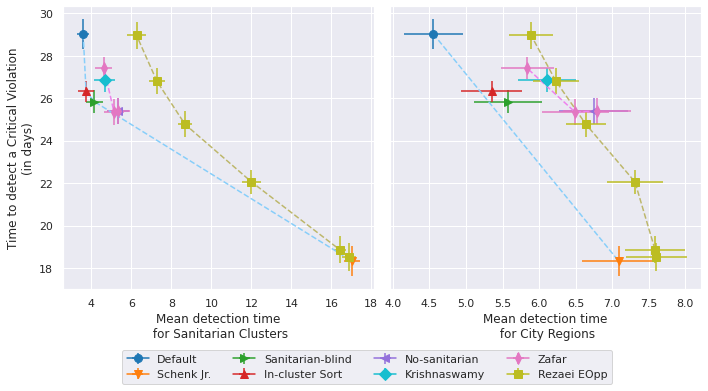

In [167]:
markersize = 8

# sns.set(font_scale=2)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, gridspec_kw={'width_ratios': [1, 1]}, figsize=(10,5))
# fig, ax1 = plt.subplots(figsize=(7,7))

for i in range(len(keys_to_plots)):
    key = keys_to_plots[i]
    ax1.errorbar(mean_diff1[i], overall_means[i], marker=key_to_plot_map[key]["marker"], color=key_to_plot_map[key]["color"], 
                 markersize=markersize, label=key_to_plot_map[key]["legend"], xerr=err_diff1[i], yerr=err_overall_means[i])    
ax1.set_ylabel('Time to detect a Critical Violation\n(in days)')
ax1.set_xlabel('Mean detection time\n for Sanitarian Clusters')
    
for i in range(len(keys_to_plots)):
    key = keys_to_plots[i]
    ax2.errorbar(mean_diff3[i], overall_means[i], marker=key_to_plot_map[key]["marker"], color=key_to_plot_map[key]["color"], 
                 markersize=markersize, xerr=err_diff3[i], yerr=err_overall_means[i])
ax2.set_xlabel('Mean detection time\n for City Regions')

# connect dots at Pareto front
# dom_idx1 = find_pareto_dominated(mean_diff1, overall_means)
dom_idx1 = [keys_to_plots.index("default"), keys_to_plots.index("incluster"), 
            keys_to_plots.index("suppressed_sanitarian"), keys_to_plots.index("schenk")]
pareto_x1 = np.take(mean_diff1, dom_idx1)
pareto_y1 = np.take(overall_means, dom_idx1)

dom_idx3 = [keys_to_plots.index("default"), keys_to_plots.index("schenk")]
pareto_x3 = np.take(mean_diff3, dom_idx3)
pareto_y3 = np.take(overall_means, dom_idx3)

ax1.plot(pareto_x1, pareto_y1, "--", color="lightskyblue")
ax2.plot(pareto_x3, pareto_y3, "--", color="lightskyblue")

z_dom_idx = [keys_to_plots.index("zafar_c1"), keys_to_plots.index("zafar_c2"),
           keys_to_plots.index("zafar_c3")]
z_pareto_x1 = np.take(mean_diff1, z_dom_idx)
z_pareto_x3 = np.take(mean_diff3, z_dom_idx)
z_pareto_y = np.take(overall_means, z_dom_idx)

ax1.plot(z_pareto_x1, z_pareto_y, "--", color="violet")
ax2.plot(z_pareto_x3, z_pareto_y, "--", color="violet")

re_dom_idx = [keys_to_plots.index("ashkan_eqopp_sanmaj_c1"), 
    keys_to_plots.index("ashkan_eqopp_sanmaj_c2"),
    keys_to_plots.index("ashkan_eqopp_sanmaj_c3"),
    keys_to_plots.index("ashkan_eqopp_sanmaj_c4"),
    keys_to_plots.index("ashkan_eqopp_sanmaj_c5"),
    keys_to_plots.index("ashkan_eqopp_sanmaj_c8")
]
re_pareto_x1 = np.take(mean_diff1, re_dom_idx)
re_pareto_x3 = np.take(mean_diff3, re_dom_idx)
re_pareto_y = np.take(overall_means, re_dom_idx)

ax1.plot(re_pareto_x1, re_pareto_y, "--", color="darkkhaki")
ax2.plot(re_pareto_x3, re_pareto_y, "--", color="darkkhaki")

fig.legend(bbox_to_anchor=(0.17,-0.1), loc="lower left", 
                bbox_transform=fig.transFigure, ncol=4)
fig.tight_layout()
plt.savefig(f"efficiency_fairness_tradeoff.pdf", bbox_inches='tight', dpi=300)
# plt.savefig(f"efficiency_fairness_tradeoff.pgf", format='pgf')
plt.show()
sns.set_theme()

### Demographic trade-off

In [20]:
mean_diff2, err_diff2 = list(), list()
for key in means_dict.keys():
    d, e = get_schedule_mean_and_error(means_dict[key]["runs"], means_dict[key]["race"])
    mean_diff2.append(d)
    err_diff2.append(e)

print(mean_diff2, err_diff2)

[1.5170940625, 2.2961507812499997, 1.8400567187500005, 1.6743559375000003, 2.8091134375, 3.77160921875, 2.61021125, 2.71419328125, 2.0230351562500006, 2.8674729687499996, 2.57991140625, 2.179483125, 2.168220625, 2.43999484375, 2.5088060937499996, 2.5654548437499995, 2.82546203125, 2.5543487500000004, 2.48227359375, 2.2705465625000008, 2.1318585937500005, 2.092704375] [0.14983270547633473, 0.22213904036974588, 0.27438210453840256, 0.2585474258086613, 0.3284170326378646, 0.5005730135864048, 0.23134550281743999, 0.3406248757163167, 0.25656183211194716, 0.3315730263995257, 0.32382056025466366, 0.2134634817932493, 0.2539270149435681, 0.23385382471832483, 0.22382830433389775, 0.21131295186970678, 0.18207025277222702, 0.19859499558224653, 0.26028233511059357, 0.28788801079757215, 0.28310096679287566, 0.27815113241364803]


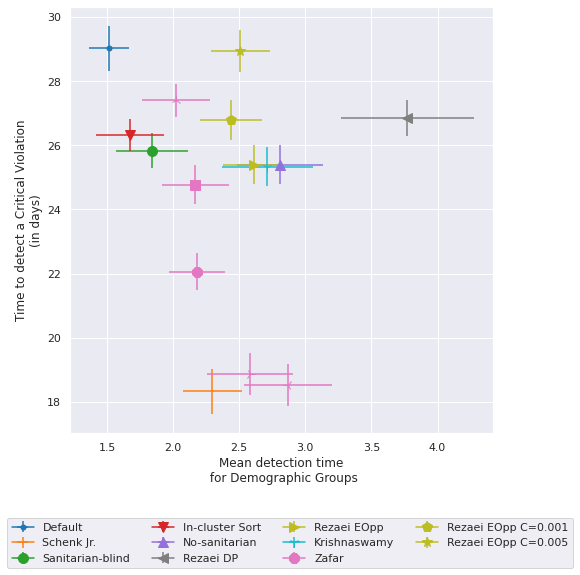

In [21]:
labels = ['Default', 'Schenk Jr.', 'Sanitarian-blind', 'In-cluster Sort', 
          'No-sanitarian', 'Rezaei DP', 'Rezaei EOpp', 'Krishnaswamy', 
          '_nolegend_', 
          '_nolegend_', 
          '_nolegend_', 
          'Zafar', 
          '_nolegend_', 
          'Rezaei EOpp C=0.001', 
          'Rezaei EOpp C=0.005',
          'Rezaei EOpp C=0.01',
          'Rezaei EOpp C=0.05',
          'Rezaei EOpp C=0.1',
          'Rezaei EOpp C=0.2',
          'Rezaei EOpp C=0.3',
          'Rezaei EOpp C=0.4',
          'Rezaei EOpp C=0.5',]
# color = iter(plt.cm.viridis(np.linspace(0, 1, len(labels))))
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "mediumpurple", "tab:gray", "tab:olive", "tab:cyan", 
          "tab:pink",
          "tab:pink", 
          "tab:pink", 
          "tab:pink",
          "tab:pink", 
         "tab:olive",
         "tab:olive",
         "tab:olive",
         "tab:olive",
         "tab:olive",
         "tab:olive",
         "tab:olive",
         "tab:olive",
         "tab:olive"]
markers = list(Line2D.markers.keys())[:len(labels)]
markersize = 10

# sns.set(font_scale=2)
fig, ax1 = plt.subplots(figsize=(7,7))

for x, y, errx, erry, m, c, l in zip(mean_diff2, overall_means, err_diff2, err_overall_means, markers, colors, labels):
    ax1.errorbar(x, y, marker=m, color=c, markersize=markersize, label=l, xerr=errx, yerr=erry)
ax1.set_ylabel('Time to detect a Critical Violation\n(in days)')
ax1.set_xlabel('Mean detection time\n for Demographic Groups')
    

fig.legend(bbox_to_anchor=(0,-0.15), loc="lower left", 
                bbox_transform=fig.transFigure, ncol=4)
fig.tight_layout()
# plt.savefig(f"efficiency_fairness_tradeoff.pdf", bbox_inches='tight', dpi=300)
# plt.savefig(f"efficiency_fairness_tradeoff.pgf", format='pgf')
plt.show()
sns.set_theme()

# Mean difference plot

**Variable Suffix Mapping**


1 - Clusters  
2 - Race  
3 - Sides  
4 - Income

In [22]:
def get_zscore_and_err(rawdata):
    mean_by_category = np.nanmean(rawdata,axis=0)
    mean = np.nanmean(rawdata)
    stddev = np.nanstd(rawdata, ddof=1)
    bar_zscore = (mean_by_category - mean)/stddev
    bar_zscore_err = stats.sem(rawdata,axis=0,nan_policy="omit").data
    return bar_zscore, bar_zscore_err

In [23]:
import numpy.ma as ma

def difference_from_sched_mean_and_err(sched_means_by_category, sched_means_by_runs):
    diff = sched_means_by_category-sched_means_by_runs.reshape((-1,1))
    bar_val = np.nanmean(diff, axis=0)
    err_val = stats.sem(diff,axis=0,nan_policy="omit")
    if isinstance(err_val, ma.core.MaskedArray):
        err_val = err_val.data
    return bar_val, err_val

In [24]:
def get_width_displacement(y_val_list):
    width_displacement = list()
    div = 1
    if len(y_val_list)%2==0:
        start = -1*(len(y_val_list)-1)
        end = (len(y_val_list))
        hop = 2
        for i in range(-1*(len(y_val_list)-1),(len(y_val_list)), hop):
            width_displacement.append(i)
        div = 2
    else:
        start = int(math.floor(len(y_val_list))/2)
        end = int(math.floor(len(y_val_list))/2)+1
        hop = 1
        for i in range(-1*start, end, hop):
            width_displacement.append(i)
    return width_displacement, div

## Inprocessing techniques

In [76]:
keys_to_plot = [
    "default",
    "schenk",
    "ns",
    "zafar_c3",
    "ashkan_eqopp_sanmaj_c8",
    "krish",
]
width_disp, denom = get_width_displacement(keys_to_plot)

In [77]:
y_val_list1, y_err_list1 = list(), list()
for key in keys_to_plot:
    y_val, y_err = difference_from_sched_mean_and_err(means_dict[key]["sanitarians"], means_dict[key]["runs"])
    y_val_list1.append(y_val)
    y_err_list1.append(y_err)

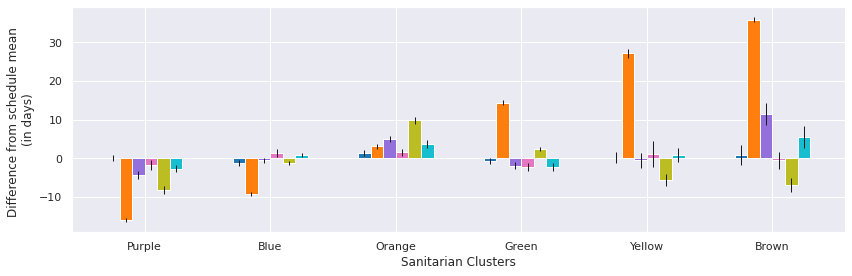

In [78]:
labels1 = ["Purple", "Blue", "Orange", "Green", "Yellow", "Brown"]

x1 = np.arange(len(labels1))  # the label locations
width1 = 0.1  # the width of the bars

fig, ax1 = plt.subplots(figsize=(12,4))
error_kwdict = dict(elinewidth = 1)

for i in range(len(y_val_list1)):
    ax1.bar(x1 + width_disp[i]*width1/denom, y_val_list1[i], width1, yerr = y_err_list1[i], error_kw = error_kwdict, 
            label=key_to_plot_map[keys_to_plot[i]]["legend"], color=key_to_plot_map[keys_to_plot[i]]["color"])

ax1.set_ylabel('Difference from schedule mean \n(in days)')
ax1.set_xlabel('Sanitarian Clusters')
ax1.set_xticks(x1)
ax1.set_xticklabels(labels1)
# fig.legend(bbox_to_anchor=(0.9,-0.1), loc="lower right", 
#                 bbox_transform=fig.transFigure, ncol=4)
fig.tight_layout()
# plt.savefig(f"inprocessing_sanitarian_figure.pdf", bbox_inches='tight', dpi=300)
plt.show()

In [28]:
y_val_list2, y_err_list2 = list(), list()
for key in keys_to_plot:
    y_val, y_err = difference_from_sched_mean_and_err(means_dict[key]["race"], means_dict[key]["runs"])
    y_val_list2.append(y_val)
    y_err_list2.append(y_err)

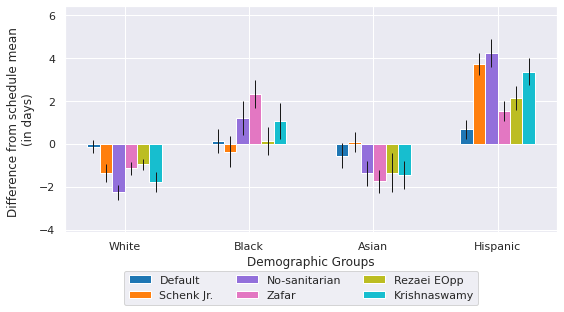

In [29]:
labels2 = ['White', 'Black', 'Asian', 'Hispanic']

x2 = np.arange(len(labels2))  # the label locations
width2 = 0.1

fig, ax1 = plt.subplots(figsize=(8,4))

for i in range(len(y_val_list2)):
    ax1.bar(x2 + width_disp[i]*width2/denom, y_val_list2[i], width2, yerr = y_err_list2[i], error_kw = error_kwdict, 
            label=key_to_plot_map[keys_to_plot[i]]["legend"], color=key_to_plot_map[keys_to_plot[i]]["color"])

ax1.set_ylabel('Difference from schedule mean \n(in days)')
ax1.set_xlabel('Demographic Groups')
ax1.set_xticks(x2)
ax1.set_xticklabels(labels2)
ax1.margins(x=0.05, y=0.2)
fig.legend(bbox_to_anchor=(0.85,-0.1), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=3)
fig.tight_layout()
plt.savefig(f"inprocessing_race_figure.pdf", bbox_inches='tight', dpi=300)
plt.show()

In [30]:
y_val_list3, y_err_list3 = list(), list()
for key in keys_to_plot:
    y_val, y_err = difference_from_sched_mean_and_err(means_dict[key]["sides"], means_dict[key]["runs"])
    y_val_list3.append(y_val)
    y_err_list3.append(y_err)

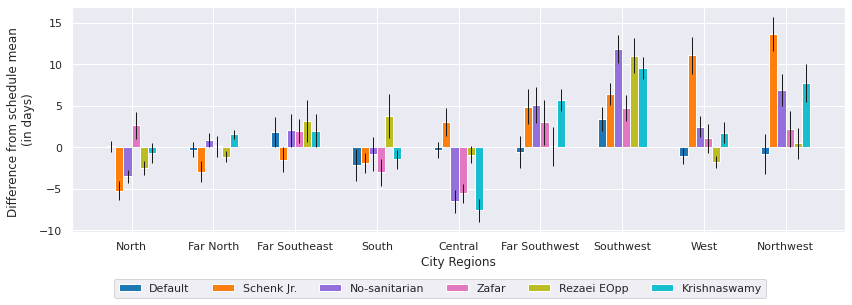

In [31]:
labels3 = ["North", "Far North", "Far Southeast", "South", "Central", "Far Southwest", "Southwest", "West", "Northwest"]

x3 = np.arange(len(labels3))  # the label locations
width3 = 0.1

fig, ax1 = plt.subplots(figsize=(12,4))

for i in range(len(y_val_list3)):
    ax1.bar(x3 + width_disp[i]*width3/denom, y_val_list3[i], width3, yerr = y_err_list3[i], error_kw = error_kwdict, 
            label=key_to_plot_map[keys_to_plot[i]]["legend"], color=key_to_plot_map[keys_to_plot[i]]["color"])

ax1.set_ylabel('Difference from schedule mean \n(in days)')
ax1.set_xlabel('City Regions')
ax1.set_xticks(x3)
ax1.set_xticklabels(labels3)
fig.legend(bbox_to_anchor=(0.9,-0.075), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=7)
fig.tight_layout()
plt.savefig(f"inprocessing_sides_figure.pdf", bbox_inches='tight', dpi=300)
plt.show()

## Post-processing techniques

In [32]:
keys_to_plot = [
    "default",
    "schenk",
    "zafar_c3",
    "krish",
    "suppressed_sanitarian",
    "incluster",
]
width_disp, denom = get_width_displacement(keys_to_plot)

In [33]:
y_val_list1, y_err_list1 = list(), list()
for key in keys_to_plot:
    y_val, y_err = difference_from_sched_mean_and_err(means_dict[key]["sanitarians"], means_dict[key]["runs"])
    y_val_list1.append(y_val)
    y_err_list1.append(y_err)

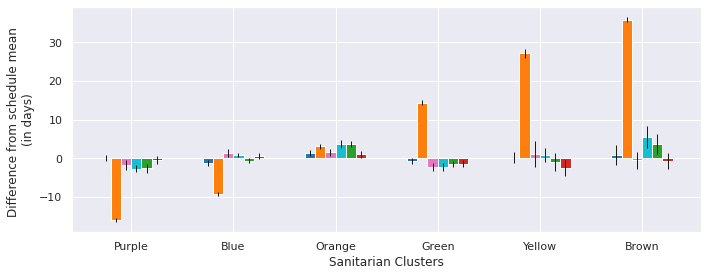

In [34]:
fig, ax1 = plt.subplots(figsize=(10,4))

for i in range(len(y_val_list1)):
    ax1.bar(x1 + width_disp[i]*width1/denom, y_val_list1[i], width1, yerr = y_err_list1[i], error_kw = error_kwdict, 
            label=key_to_plot_map[keys_to_plot[i]]["legend"], color=key_to_plot_map[keys_to_plot[i]]["color"])

ax1.set_ylabel('Difference from schedule mean \n(in days)')
ax1.set_xlabel('Sanitarian Clusters')
ax1.set_xticks(x1)
ax1.set_xticklabels(labels1)
# ax1.margins(x=0.05, y=0.2)
# fig.legend(bbox_to_anchor=(1.0,-0.05), loc="lower right", 
#                 bbox_transform=fig.transFigure, ncol=6)
fig.tight_layout()
plt.savefig(f"postprocessing_sanitarian_figure.pdf", bbox_inches='tight', dpi=300)
plt.show()

In [35]:
y_val_list2, y_err_list2 = list(), list()
for key in keys_to_plot:
    y_val, y_err = difference_from_sched_mean_and_err(means_dict[key]["race"], means_dict[key]["runs"])
    y_val_list2.append(y_val)
    y_err_list2.append(y_err)

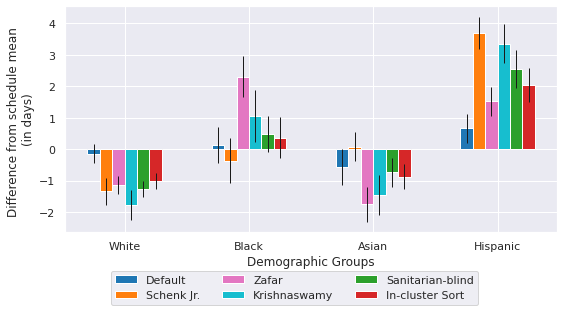

In [36]:
fig, ax1 = plt.subplots(figsize=(8,4))

for i in range(len(y_val_list2)):
    ax1.bar(x2 + width_disp[i]*width2/denom, y_val_list2[i], width2, yerr = y_err_list2[i], error_kw = error_kwdict, 
            label=key_to_plot_map[keys_to_plot[i]]["legend"], color=key_to_plot_map[keys_to_plot[i]]["color"])

ax1.set_ylabel('Difference from schedule mean \n(in days)')
ax1.set_xlabel('Demographic Groups')
ax1.set_xticks(x2)
ax1.set_xticklabels(labels2)
# ax1.margins(x=0.05, y=0.2)
# ax1.set_ylim([0, 60])
fig.legend(bbox_to_anchor=(0.85,-0.1), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=3)
fig.tight_layout()
plt.savefig(f"postprocessing_race_figure.pdf", bbox_inches='tight', dpi=300)
plt.show()

In [37]:
y_val_list3, y_err_list3 = list(), list()
for key in keys_to_plot:
    y_val, y_err = difference_from_sched_mean_and_err(means_dict[key]["sides"], means_dict[key]["runs"])
    y_val_list3.append(y_val)
    y_err_list3.append(y_err)

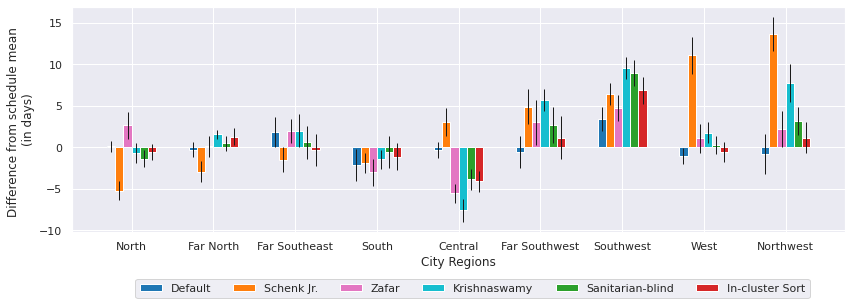

In [38]:
fig, ax1 = plt.subplots(figsize=(12,4))

for i in range(len(y_val_list3)):
    ax1.bar(x3 + width_disp[i]*width3/denom, y_val_list3[i], width3, yerr = y_err_list3[i], error_kw = error_kwdict, 
            label=key_to_plot_map[keys_to_plot[i]]["legend"], color=key_to_plot_map[keys_to_plot[i]]["color"])

ax1.set_ylabel('Difference from schedule mean \n(in days)')
ax1.set_xlabel('City Regions')
ax1.set_xticks(x3)
ax1.set_xticklabels(labels3)
# ax1.margins(x=0.05, y=0.2)
fig.legend(bbox_to_anchor=(0.95,-0.075), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=7)
fig.tight_layout()
plt.savefig(f"postprocessing_sides_figure.pdf", bbox_inches='tight', dpi=300)
plt.show()

## Everything is relative

In [193]:
insp_keys = [
    "default",
    "schenk",
    "suppressed_sanitarian",
    "incluster",
    "ns",
    "ashkan_dp_sanmaj",
    "ashkan_dp_sanmaj_c8",
    "ashkan_eqopp_sanmaj",
    "krish",
    "zafar_c3"
]

In [194]:
insp_means_dict = dict()
for key in insp_keys:
    print(f"{key}: {key_to_plot_map[key]['csv_header']}")
    res_dict = get_sched_mean_and_san_mean(inspection_df, 
                                           key_to_plot_map[key]['csv_header'], dict())
    insp_means_dict[key] = get_sched_mean_and_san_mean(sides_inspection_df, 
                                                       key_to_plot_map[key]['csv_header'], 
                                                       eval_dict = res_dict, sides=True)

default: Default Ordering
schenk: Original Model Ordering
suppressed_sanitarian: Suppressed Sanitarian Model
incluster: In-cluster Ordering
ns: No-Sanitarian Model Overall
ashkan_dp_sanmaj: Baseline Fairlogloss Model-DP-Overall-SanMaj
ashkan_dp_sanmaj_c8: Baseline Fairlogloss Model-DP-Overall-SanMaj-C0.5
ashkan_eqopp_sanmaj: Baseline Fairlogloss Model-EqOpp-Overall-SanMaj
krish: Baseline Krishnaswamy Preds
zafar_c3: Baseline Zafar c0.001


In [181]:
keys_to_plot = [
    "default",
    "schenk"
]
width_disp, denom = get_width_displacement(keys_to_plot)

In [182]:
insp_y_val_list1, insp_y_err_list1 = list(), list()
for key in keys_to_plot:
    y_val, y_err = difference_from_sched_mean_and_err(insp_means_dict[key]["sanitarians"], insp_means_dict[key]["runs"])
    insp_y_val_list1.append(y_val)
    insp_y_err_list1.append(y_err)
    
y_val_list1, y_err_list1 = list(), list()
for key in keys_to_plot:
    y_val, y_err = difference_from_sched_mean_and_err(means_dict[key]["sanitarians"], means_dict[key]["runs"])
    y_val_list1.append(y_val)
    y_err_list1.append(y_err)

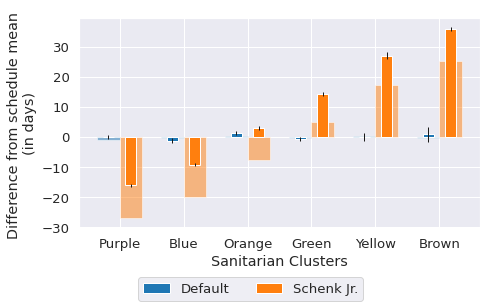

In [183]:
x = np.arange(len(labels1))  # the label locations
width = 0.35  # the width of the bars

sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(7,4))
error_kwdict = dict(elinewidth = 1)

for i in range(len(insp_y_val_list1)):
    ax.bar(x + width_disp[i]*width/denom, insp_y_val_list1[i], width, error_kw = error_kwdict, 
            color=key_to_plot_map[keys_to_plot[i]]["color"], alpha=0.5)

for i in range(len(y_val_list1)):
    ax.bar(x + width_disp[i]*width/denom, y_val_list1[i], width=0.5*width, yerr = y_err_list1[i], error_kw = error_kwdict, 
            label=key_to_plot_map[keys_to_plot[i]]["legend"], color=key_to_plot_map[keys_to_plot[i]]["color"])


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Difference from schedule mean \n(in days)')
ax.set_xlabel('Sanitarian Clusters')
ax.set_xticks(x)
ax.set_xticklabels(labels1)
ax.legend(bbox_to_anchor=(0.75,-0.06), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=2)


fig.tight_layout()
plt.savefig(f"sanitarian_violation_inspection_time.pdf", bbox_inches='tight', dpi=300)

plt.show()
sns.set_theme()

## Finish your Sides!

In [44]:
insp_y_val_list1, insp_y_err_list1 = list(), list()
for key in keys_to_plot:
    y_val, y_err = difference_from_sched_mean_and_err(insp_means_dict[key]["sides"], insp_means_dict[key]["runs"])
    insp_y_val_list1.append(y_val)
    insp_y_err_list1.append(y_err)
    
y_val_list1, y_err_list1 = list(), list()
for key in keys_to_plot:
    y_val, y_err = difference_from_sched_mean_and_err(means_dict[key]["sides"], means_dict[key]["runs"])
    y_val_list1.append(y_val)
    y_err_list1.append(y_err)

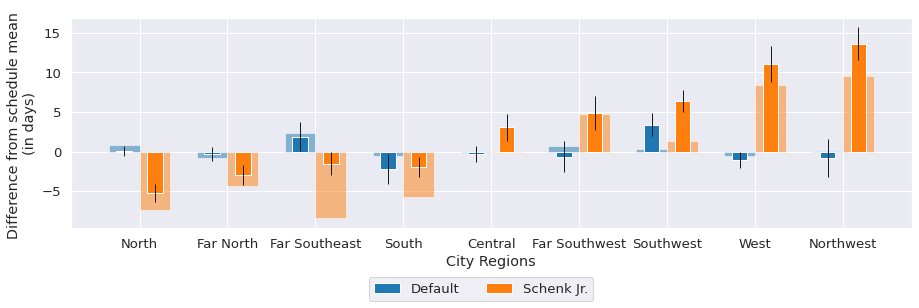

In [45]:
labels3_short = ["N", "FN", "FSE", "S", "C", "FSW", "SW", "W", "NW"]
x = np.arange(len(labels3))  # the label locations
width = 0.35  # the width of the bars

sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(13,4))
# fig, ax = plt.subplots(figsize=(7,4))
error_kwdict = dict(elinewidth = 1)

# Section 3 figure
for i in range(len(insp_y_val_list1)):
    ax.bar(x + width_disp[i]*width/denom, insp_y_val_list1[i], width, error_kw = error_kwdict, 
            color=key_to_plot_map[keys_to_plot[i]]["color"], alpha=0.5)

for i in range(len(y_val_list1)):
    ax.bar(x + width_disp[i]*width/denom, y_val_list1[i], width=0.5*width, yerr = y_err_list1[i], error_kw = error_kwdict, 
            label=key_to_plot_map[keys_to_plot[i]]["legend"], color=key_to_plot_map[keys_to_plot[i]]["color"])


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Difference from schedule mean \n(in days)')
ax.set_xlabel('City Regions')
ax.set_xticks(x)
ax.set_xticklabels(labels3)
ax.legend(bbox_to_anchor=(0.65,-0.06), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=2)


fig.tight_layout()
plt.savefig(f"sides_violation_inspection_time.pdf", bbox_inches='tight', dpi=300)

plt.show()
sns.set_theme()

# Inspection Times

## Inprocessing

In [195]:
keys_to_plot = [
    "default",
    "schenk",
    "ns",
    "zafar_c3",
    "ashkan_dp_sanmaj_c8",
    "krish",
]
width_disp, denom = get_width_displacement(keys_to_plot)

In [196]:
insp_y_val_list1, insp_y_err_list1 = list(), list()
for key in keys_to_plot:
    y_val, y_err = difference_from_sched_mean_and_err(insp_means_dict[key]["sanitarians"], insp_means_dict[key]["runs"])
    insp_y_val_list1.append(y_val)
    insp_y_err_list1.append(y_err)

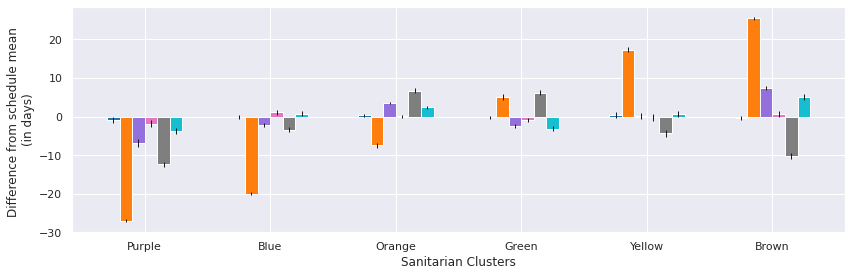

In [197]:
fig, ax1 = plt.subplots(figsize=(12,4))
error_kwdict = dict(elinewidth = 1)

for i in range(len(insp_y_val_list1)):
    ax1.bar(x1 + width_disp[i]*width1/denom, insp_y_val_list1[i], width1, yerr = insp_y_err_list1[i], error_kw = error_kwdict, 
            label=key_to_plot_map[keys_to_plot[i]]["legend"], color=key_to_plot_map[keys_to_plot[i]]["color"])

ax1.set_ylabel('Difference from schedule mean \n(in days)')
ax1.set_xlabel('Sanitarian Clusters')
ax1.set_xticks(x1)
ax1.set_xticklabels(labels1)
fig.tight_layout()
plt.savefig(f"inprocessing_sanitarian_dp_figure.pdf", bbox_inches='tight', dpi=300)
plt.show()

In [198]:
insp_y_val_list2, insp_y_err_list2 = list(), list()
for key in keys_to_plot:
    y_val, y_err = difference_from_sched_mean_and_err(insp_means_dict[key]["race"], insp_means_dict[key]["runs"])
    insp_y_val_list2.append(y_val)
    insp_y_err_list2.append(y_err)

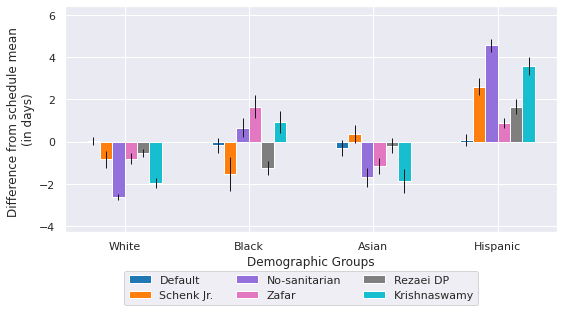

In [199]:
labels2 = ['White', 'Black', 'Asian', 'Hispanic']

x2 = np.arange(len(labels2))  # the label locations
width2 = 0.1

fig, ax1 = plt.subplots(figsize=(8,4))

for i in range(len(insp_y_val_list2)):
    ax1.bar(x2 + width_disp[i]*width2/denom, insp_y_val_list2[i], width2, yerr = insp_y_err_list2[i], error_kw = error_kwdict, 
            label=key_to_plot_map[keys_to_plot[i]]["legend"], color=key_to_plot_map[keys_to_plot[i]]["color"])

ax1.set_ylabel('Difference from schedule mean \n(in days)')
ax1.set_xlabel('Demographic Groups')
ax1.set_xticks(x2)
ax1.set_xticklabels(labels2)
ax1.margins(x=0.05, y=0.2)
fig.legend(bbox_to_anchor=(0.85,-0.1), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=3)
fig.tight_layout()
plt.savefig(f"inprocessing_race_dp_figure.pdf", bbox_inches='tight', dpi=300)
plt.show()

In [200]:
insp_y_val_list3, insp_y_err_list3 = list(), list()
for key in keys_to_plot:
    y_val, y_err = difference_from_sched_mean_and_err(insp_means_dict[key]["sides"], insp_means_dict[key]["runs"])
    insp_y_val_list3.append(y_val)
    insp_y_err_list3.append(y_err)

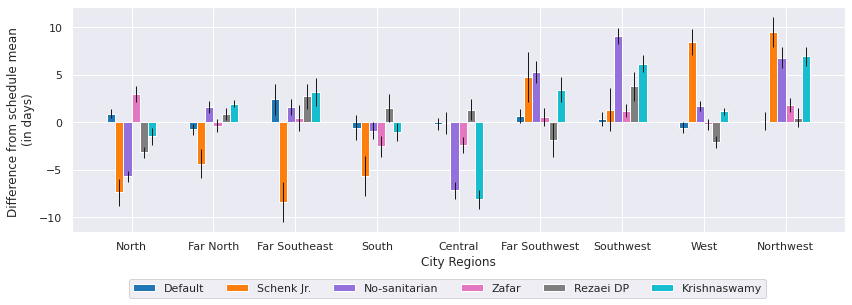

In [201]:
fig, ax1 = plt.subplots(figsize=(12,4))

for i in range(len(insp_y_val_list3)):
    ax1.bar(x3 + width_disp[i]*width3/denom, insp_y_val_list3[i], width3, yerr = insp_y_err_list3[i], error_kw = error_kwdict, 
            label=key_to_plot_map[keys_to_plot[i]]["legend"], color=key_to_plot_map[keys_to_plot[i]]["color"])

ax1.set_ylabel('Difference from schedule mean \n(in days)')
ax1.set_xlabel('City Regions')
ax1.set_xticks(x3)
ax1.set_xticklabels(labels3)
fig.legend(bbox_to_anchor=(0.9,-0.075), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=7)
fig.tight_layout()
plt.savefig(f"inprocessing_sides_dp_figure.pdf", bbox_inches='tight', dpi=300)
plt.show()

## Post-processing techniques

In [53]:
keys_to_plot = [
    "default",
    "schenk",
    "zafar_c3",
    "krish",
    "suppressed_sanitarian",
    "incluster",
]
width_disp, denom = get_width_displacement(keys_to_plot)

In [54]:
insp_y_val_list1, insp_y_err_list1 = list(), list()
for key in keys_to_plot:
    y_val, y_err = difference_from_sched_mean_and_err(insp_means_dict[key]["sanitarians"], insp_means_dict[key]["runs"])
    insp_y_val_list1.append(y_val)
    insp_y_err_list1.append(y_err)

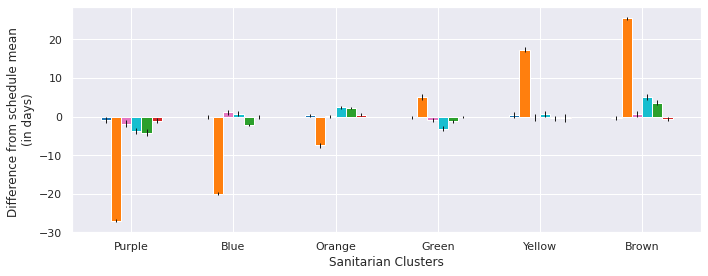

In [55]:
fig, ax1 = plt.subplots(figsize=(10,4))

for i in range(len(insp_y_val_list1)):
    ax1.bar(x1 + width_disp[i]*width1/denom, insp_y_val_list1[i], width1, yerr = insp_y_err_list1[i], error_kw = error_kwdict, 
            label=key_to_plot_map[keys_to_plot[i]]["legend"], color=key_to_plot_map[keys_to_plot[i]]["color"])

ax1.set_ylabel('Difference from schedule mean \n(in days)')
ax1.set_xlabel('Sanitarian Clusters')
ax1.set_xticks(x1)
ax1.set_xticklabels(labels1)
fig.tight_layout()
plt.savefig(f"postprocessing_sanitarian_dp_figure.pdf", bbox_inches='tight', dpi=300)
plt.show()

In [56]:
insp_y_val_list2, insp_y_err_list2 = list(), list()
for key in keys_to_plot:
    y_val, y_err = difference_from_sched_mean_and_err(insp_means_dict[key]["race"], insp_means_dict[key]["runs"])
    insp_y_val_list2.append(y_val)
    insp_y_err_list2.append(y_err)

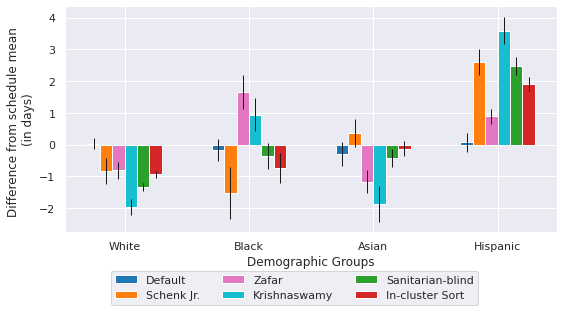

In [57]:
fig, ax1 = plt.subplots(figsize=(8,4))

for i in range(len(insp_y_val_list2)):
    ax1.bar(x2 + width_disp[i]*width2/denom, insp_y_val_list2[i], width2, yerr = insp_y_err_list2[i], error_kw = error_kwdict, 
            label=key_to_plot_map[keys_to_plot[i]]["legend"], color=key_to_plot_map[keys_to_plot[i]]["color"])

ax1.set_ylabel('Difference from schedule mean \n(in days)')
ax1.set_xlabel('Demographic Groups')
ax1.set_xticks(x2)
ax1.set_xticklabels(labels2)
fig.legend(bbox_to_anchor=(0.85,-0.1), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=3)
fig.tight_layout()
plt.savefig(f"postprocessing_race_dp_figure.pdf", bbox_inches='tight', dpi=300)
plt.show()

In [58]:
insp_y_val_list3, insp_y_err_list3 = list(), list()
for key in keys_to_plot:
    y_val, y_err = difference_from_sched_mean_and_err(insp_means_dict[key]["sides"], insp_means_dict[key]["runs"])
    insp_y_val_list3.append(y_val)
    insp_y_err_list3.append(y_err)

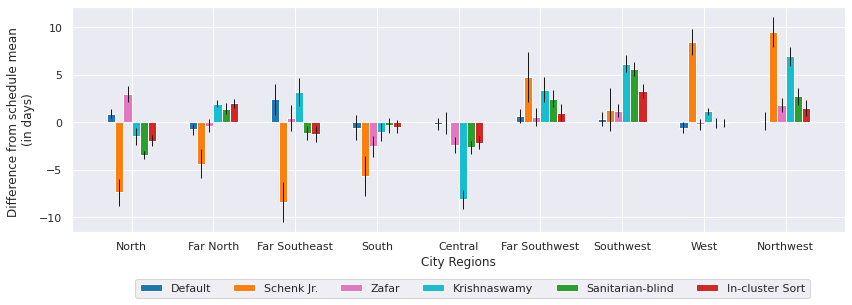

In [59]:
fig, ax1 = plt.subplots(figsize=(12,4))

for i in range(len(insp_y_val_list3)):
    ax1.bar(x3 + width_disp[i]*width3/denom, insp_y_val_list3[i], width3, yerr = insp_y_err_list3[i], error_kw = error_kwdict, 
            label=key_to_plot_map[keys_to_plot[i]]["legend"], color=key_to_plot_map[keys_to_plot[i]]["color"])

ax1.set_ylabel('Difference from schedule mean \n(in days)')
ax1.set_xlabel('City Regions')
ax1.set_xticks(x3)
ax1.set_xticklabels(labels3)
fig.legend(bbox_to_anchor=(0.95,-0.075), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=7)
fig.tight_layout()
plt.savefig(f"postprocessing_sides_dp_figure.pdf", bbox_inches='tight', dpi=300)
plt.show()

## Inspection Trade-off

In [60]:
insp_mean_diff1, insp_err_diff1 = list(), list()
for key in insp_means_dict.keys():
    d, e = get_schedule_mean_and_error(insp_means_dict[key]["runs"], insp_means_dict[key]["sanitarians"])
    insp_mean_diff1.append(d)
    insp_err_diff1.append(e)

print(insp_mean_diff1, insp_err_diff1)

[1.7142977083333335, 17.073304546875, 2.8137171874999996, 1.8632929166666665, 4.302758541666666, 10.482351630208331, 15.437956682291667, 3.2485806249999998, 2.3356212500000004] [0.16299442420031005, 0.23788885178420544, 0.18667523720811618, 0.20221022368919148, 0.22613072816316585, 0.7860658945533923, 0.20470154685587544, 0.4379542854136411, 0.2085046731327211]


In [61]:
insp_mean_diff3, insp_err_diff3 = list(), list()
for key in insp_means_dict.keys():
    d, e = get_schedule_mean_and_error(insp_means_dict[key]["runs"], insp_means_dict[key]["sides"])
    insp_mean_diff3.append(d)
    insp_err_diff3.append(e)

print(insp_mean_diff3, insp_err_diff3)

[2.647124861111111, 8.035631041666665, 3.102687361111111, 2.631965277777778, 5.051402569444445, 6.764612291666667, 7.266959444444444, 4.506989027777777, 3.036760486111111] [0.24322274418515968, 0.3497232198161788, 0.1483629851690799, 0.11280209514681606, 0.19509633038401264, 0.5260456149000979, 0.3897240263020597, 0.38516900625071243, 0.18349577900150182]


In [62]:
insp_overall_means, insp_err_overall_means = list(), list()

for key in insp_means_dict.keys():
    insp_overall_means.append(np.nanmean(insp_means_dict[key]["runs"]))
    insp_err_overall_means.append(stats.sem(insp_means_dict[key]["runs"], nan_policy='omit'))

print(insp_overall_means, insp_err_overall_means)

[29.5717175, 29.5717175, 29.5717175, 29.17061375, 29.5717175, 29.5717175, 29.5717175, 29.5717175, 29.5717175] [0.5969208930311312, 0.5969208930311312, 0.5969208930311312, 0.5609507865712423, 0.5969208930311312, 0.5969208930311312, 0.5969208930311312, 0.5969208930311312, 0.5969208930311312]


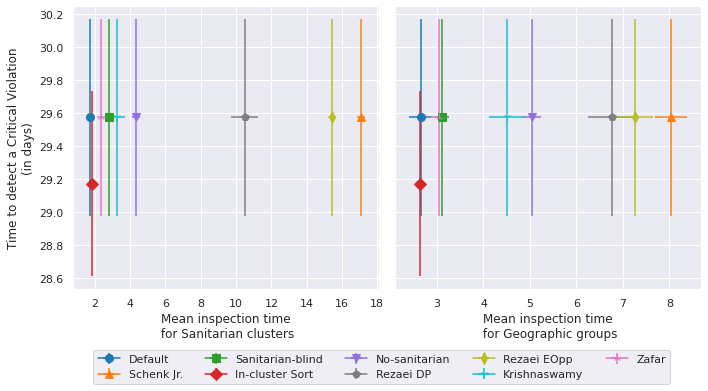

In [63]:
labels = ['Default', 'Schenk Jr.', 'Sanitarian-blind', 'In-cluster Sort', 
          'No-sanitarian', 'Rezaei DP', 'Rezaei EOpp', 'Krishnaswamy', 'Zafar']
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "mediumpurple", "tab:gray", "tab:olive", "tab:cyan", "tab:pink"]
markers = ["o", "^", "s", "D", "v", "p", "d", "1", "2"]
markersize = 8

# sns.set(font_scale=2)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, gridspec_kw={'width_ratios': [1, 1]}, figsize=(10,5))
# fig, ax1 = plt.subplots(figsize=(7,7))

for x, y, m, c, l, errx, erry in zip(insp_mean_diff1, insp_overall_means, markers, colors, labels, insp_err_diff1, insp_err_overall_means):
    ax1.errorbar(x, y, marker=m, color=c, markersize=markersize, label=l, xerr=errx, yerr=erry)
ax1.set_ylabel('Time to detect a Critical Violation\n(in days)')
ax1.set_xlabel('Mean inspection time\n for Sanitarian clusters')
    
for x, y, m, c, errx, erry in zip(insp_mean_diff3, insp_overall_means, markers, colors, insp_err_diff3, insp_err_overall_means):
    ax2.errorbar(x, y, marker=m, color=c, markersize=markersize, xerr=errx, yerr=erry)
ax2.set_xlabel('Mean inspection time\n for Geographic groups')

fig.legend(bbox_to_anchor=(0.13,-0.1), loc="lower left", 
                bbox_transform=fig.transFigure, ncol=5)
fig.tight_layout()
# plt.savefig(f"efficiency_fairness_tradeoff_dp.pdf", bbox_inches='tight', dpi=300)
# plt.savefig(f"efficiency_fairness_tradeoff.pgf", format='pgf')
plt.show()
sns.set_theme()

## It's all about the money!🤑

In [64]:
income_violation_df = read_and_process_df("./60 day numbers - income-violation-time.csv")

keys_to_plot = [
    "default",
    "schenk"
]

for key in keys_to_plot:
    print(f"{key} : {key_to_plot_map[key]['csv_header']}")
    res_dict = get_sched_mean_and_san_mean(income_violation_df, key_to_plot_map[key]["csv_header"], means_dict[key],
                                          income_fed = True)
    means_dict[key] = get_sched_mean_and_san_mean(income_violation_df, key_to_plot_map[key]["csv_header"], 
                                                      eval_dict = res_dict, income_uni=True)

default : Default Ordering
schenk : Original Model Ordering


In [65]:
width_disp, denom = get_width_displacement(keys_to_plot)

In [66]:
y_val_list4, y_err_list4 = list(), list()
for key in keys_to_plot:
    y_val, y_err = difference_from_sched_mean_and_err(means_dict[key]["income_fed"], means_dict[key]["runs"])
    y_val_list4.append(y_val)
    y_err_list4.append(y_err)
    
y_val_list5, y_err_list5 = list(), list()
for key in keys_to_plot:
    y_val, y_err = difference_from_sched_mean_and_err(means_dict[key]["income_uni"], means_dict[key]["runs"])
    y_val_list5.append(y_val)
    y_err_list5.append(y_err)

In [67]:
labels4 = np.array(["<15K","15K-55K","55K-90K",">90K"])
labels5 = np.array(["<20K","20K-40K","40K-60K","60K-80K","80K-100K","100K-120K",">120K"])

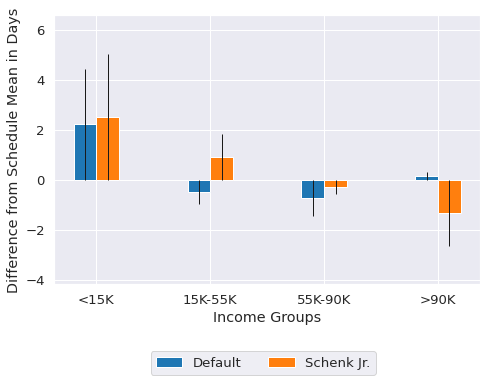

In [68]:
x = np.arange(len(labels4))  # the label locations
width = 0.2  # the width of the bars

sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(7,5))
error_kwdict = dict(elinewidth = 1)

#plot_bars
for i in range(len(y_val_list4)):
    ax.bar(x + width_disp[i]*width/denom, y_val_list4[i], width, yerr = y_val_list4[i], error_kw = error_kwdict, 
            label=key_to_plot_map[keys_to_plot[i]]["legend"], color=key_to_plot_map[keys_to_plot[i]]["color"])


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Difference from Schedule Mean\n(in days)')
ax.set_xlabel('Income Groups')
ax.set_xticks(x)
ax.set_xticklabels(labels4)
# ax.legend()
ax.margins(x=0.05, y=0.2)
ax.legend(bbox_to_anchor=(0.775,-0.06), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=2)


fig.tight_layout()
plt.savefig(f"income_federal_violation_time.pdf", bbox_inches='tight', dpi=300)

plt.show()
sns.set_theme()

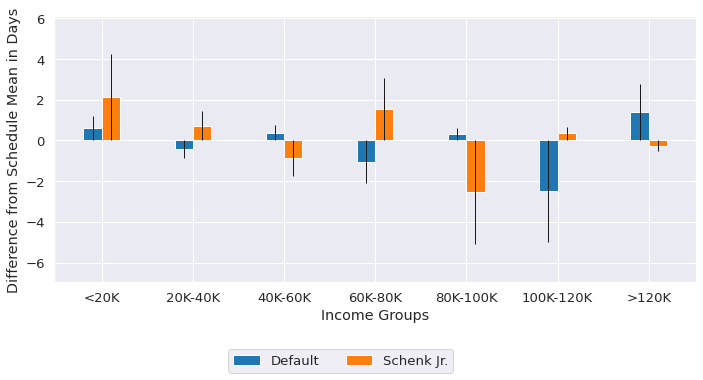

In [69]:
x = np.arange(len(labels5))  # the label locations
width = 0.2  # the width of the bars

sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(10,5))
error_kwdict = dict(elinewidth = 1)

#plot_bars
for i in range(len(y_val_list5)):
    ax.bar(x + width_disp[i]*width/denom, y_val_list5[i], width, yerr = y_val_list5[i], error_kw = error_kwdict, 
            label=key_to_plot_map[keys_to_plot[i]]["legend"], color=key_to_plot_map[keys_to_plot[i]]["color"])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Difference from Schedule Mean\n(in days)')
ax.set_xlabel('Income Groups')
ax.set_xticks(x)
ax.set_xticklabels(labels5)
# ax.legend()
ax.margins(x=0.05, y=0.2)
ax.legend(bbox_to_anchor=(0.65,-0.06), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=2)


fig.tight_layout()
plt.savefig(f"income_uniform_violation_time.pdf", bbox_inches='tight', dpi=300)

plt.show()
sns.set_theme()

In [228]:
yelp_df = read_and_process_df("Yelp Related Analysis - yelp_sheet.csv")

In [229]:
keys_to_plot = [
    "default",
    "schenk"
]

for key in keys_to_plot:
    print(f"{key} : {key_to_plot_map[key]['csv_header']}")
    res_dict = get_sched_mean_and_san_mean(yelp_df, key_to_plot_map[key]["csv_header"], means_dict[key],
                                          yelp = True)
    means_dict[key] = get_sched_mean_and_san_mean(yelp_df, key_to_plot_map[key]["csv_header"], 
                                                      eval_dict = res_dict, yelp=True)

default : Default Ordering
schenk : Original Model Ordering


In [239]:
width_disp, denom = get_width_displacement(keys_to_plot)

y_val_list6, y_err_list6 = list(), list()
for key in keys_to_plot:
    y_val, y_err = difference_from_sched_mean_and_err(means_dict[key]["yelp"], means_dict[key]["runs"])
#     y_val, y_err = get_bar_and_error(means_dict[key]["yelp"])
    y_val_list6.append(y_val)
    y_err_list6.append(y_err)

In [240]:
labels6 = np.array(["None","\$","\$\$","\$\$\$","\$\$\$\$"])

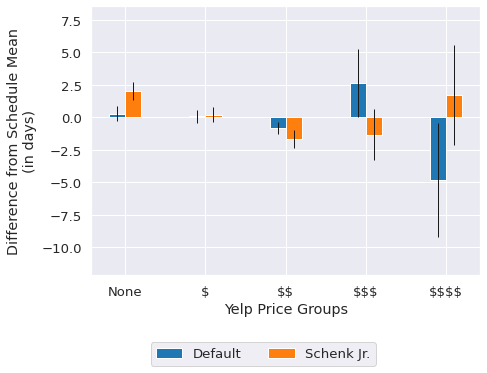

In [241]:
x = np.arange(len(labels6))  # the label locations
width = 0.2  # the width of the bars

sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(7,5))
error_kwdict = dict(elinewidth = 1)

#plot_bars
for i in range(len(y_val_list6)):
    ax.bar(x + width_disp[i]*width/denom, y_val_list6[i], width, yerr = y_err_list6[i], error_kw = error_kwdict, 
            label=key_to_plot_map[keys_to_plot[i]]["legend"], color=key_to_plot_map[keys_to_plot[i]]["color"])


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Difference from Schedule Mean\n(in days)')
ax.set_xlabel('Yelp Price Groups')
ax.set_xticks(x)
ax.set_xticklabels(labels6)
# ax.legend()
ax.margins(x=0.05, y=0.2)
ax.legend(bbox_to_anchor=(0.775,-0.06), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=2)


fig.tight_layout()
plt.savefig(f"yelp_violation_time.pdf", bbox_inches='tight', dpi=300)

plt.show()
sns.set_theme()

# Schedule Posts

## Inprocessing techniques

In [217]:
def get_bar_and_error(rawdata):
    bar = np.nanmean(rawdata,axis=0)
    err = stats.sem(rawdata,axis=0,nan_policy="omit").data
    return bar, err

In [73]:
keys_to_plot = [
    "default",
    "schenk",
    "ns",
    "ashkan_dp_sanmaj",
    "ashkan_eqopp_sanmaj",
]
width_disp, denom = get_width_displacement(keys_to_plot)

In [74]:
y_val_list1, y_err_list1 = list(), list()
for key in keys_to_plot:
    y_val, y_err = get_bar_and_error(means_dict[key]["sanitarians"])
    y_val_list1.append(y_val)
    y_err_list1.append(y_err)

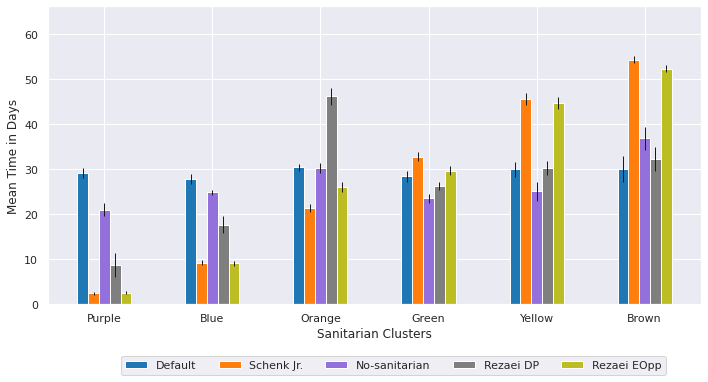

In [75]:
labels1 = ["Purple", "Blue", "Orange", "Green", "Yellow", "Brown"]

x1 = np.arange(len(labels1))  # the label locations
width1 = 0.1  # the width of the bars

fig, ax1 = plt.subplots(figsize=(10,5))
error_kwdict = dict(elinewidth = 1)

for i in range(len(y_val_list1)):
    ax1.bar(x1 + width_disp[i]*width1/denom, y_val_list1[i], width1, yerr = y_err_list1[i], error_kw = error_kwdict, 
            label=key_to_plot_map[keys_to_plot[i]]["legend"], color=key_to_plot_map[keys_to_plot[i]]["color"])

ax1.set_ylabel('Mean Time in Days')
ax1.set_xlabel('Sanitarian Clusters')
ax1.set_xticks(x1)
ax1.set_xticklabels(labels1)
ax1.margins(x=0.05, y=0.2)
fig.legend(bbox_to_anchor=(0.94,-0.075), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=5)
fig.tight_layout()
# plt.savefig(f"inprocessing_sanitarian_figure.pdf", bbox_inches='tight', dpi=300)
plt.show()

In [76]:
y_val_list2, y_err_list2 = list(), list()
for key in keys_to_plot:
    y_val, y_err = get_bar_and_error(means_dict[key]["race"])
    y_val_list2.append(y_val)
    y_err_list2.append(y_err)

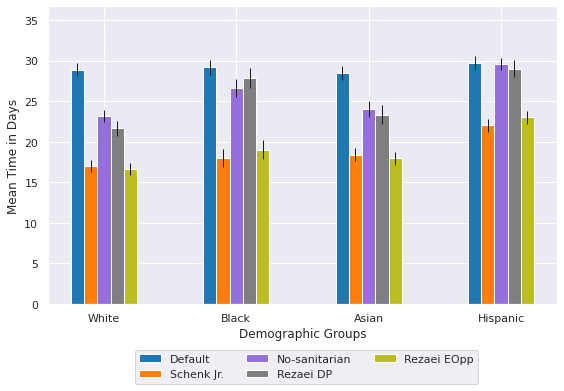

In [77]:
labels2 = ['White', 'Black', 'Asian', 'Hispanic']

x2 = np.arange(len(labels2))  # the label locations
width2 = 0.1

fig, ax1 = plt.subplots(figsize=(8,5))

for i in range(len(y_val_list2)):
    ax1.bar(x2 + width_disp[i]*width2/denom, y_val_list2[i], width2, yerr = y_err_list2[i], error_kw = error_kwdict, 
            label=key_to_plot_map[keys_to_plot[i]]["legend"], color=key_to_plot_map[keys_to_plot[i]]["color"])

ax1.set_ylabel('Mean Time in Days')
ax1.set_xlabel('Demographic Groups')
ax1.set_xticks(x2)
ax1.set_xticklabels(labels2)
ax1.margins(x=0.05, y=0.2)
# ax1.set_ylim([0, 60])
fig.legend(bbox_to_anchor=(0.85,-0.1), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=3)
fig.tight_layout()
# plt.savefig(f"inprocessing_race_figure.pdf", bbox_inches='tight', dpi=300)
plt.show()

## Post-processing techniques

In [78]:
keys_to_plot = [
    "default",
    "schenk",
    "suppressed_sanitarian",
    "incluster"
]
width_disp, denom = get_width_displacement(keys_to_plot)

In [79]:
y_val_list1, y_err_list1 = list(), list()
for key in keys_to_plot:
    y_val, y_err = get_bar_and_error(means_dict[key]["sanitarians"])
    y_val_list1.append(y_val)
    y_err_list1.append(y_err)

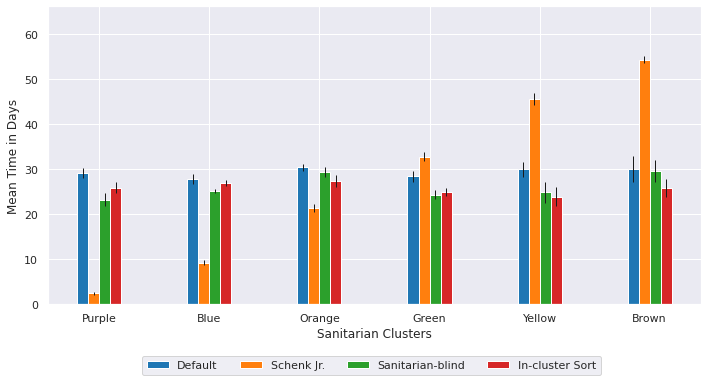

In [80]:
fig, ax1 = plt.subplots(figsize=(10,5))

for i in range(len(y_val_list1)):
    ax1.bar(x1 + width_disp[i]*width1/denom, y_val_list1[i], width1, yerr = y_err_list1[i], error_kw = error_kwdict, 
            label=key_to_plot_map[keys_to_plot[i]]["legend"], color=key_to_plot_map[keys_to_plot[i]]["color"])

ax1.set_ylabel('Mean Time in Days')
ax1.set_xlabel('Sanitarian Clusters')
ax1.set_xticks(x1)
ax1.set_xticklabels(labels1)
ax1.margins(x=0.05, y=0.2)
fig.legend(bbox_to_anchor=(0.85,-0.075), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=4)
fig.tight_layout()
# plt.savefig(f"postprocessing_sanitarian_figure.pdf", bbox_inches='tight', dpi=300)
plt.show()

In [81]:
y_val_list2, y_err_list2 = list(), list()
for key in keys_to_plot:
    y_val, y_err = get_bar_and_error(means_dict[key]["race"])
    y_val_list2.append(y_val)
    y_err_list2.append(y_err)

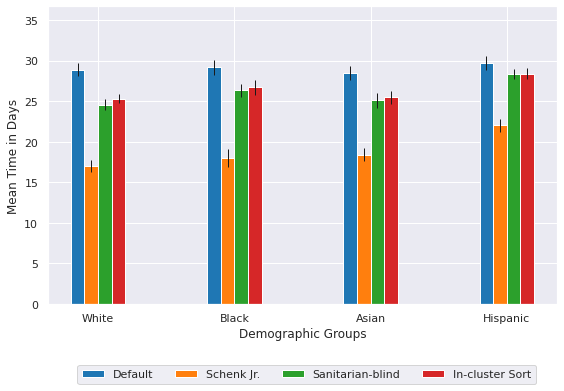

In [82]:
fig, ax1 = plt.subplots(figsize=(8,5))

for i in range(len(y_val_list2)):
    ax1.bar(x2 + width_disp[i]*width2/denom, y_val_list2[i], width2, yerr = y_err_list2[i], error_kw = error_kwdict, 
            label=key_to_plot_map[keys_to_plot[i]]["legend"], color=key_to_plot_map[keys_to_plot[i]]["color"])

ax1.set_ylabel('Mean Time in Days')
ax1.set_xlabel('Demographic Groups')
ax1.set_xticks(x2)
ax1.set_xticklabels(labels2)
ax1.margins(x=0.05, y=0.2)
# ax1.set_ylim([0, 60])
fig.legend(bbox_to_anchor=(0.95,-0.1), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=4)
fig.tight_layout()
# plt.savefig(f"postprocessing_race_figure.pdf", bbox_inches='tight', dpi=300)
plt.show()